# Optimizer Example
MNIST RNN example showing comparison between optimizers which were around when Adam was introduced.  This is a classification problem.

Richard Henry, 15-Jul-2024 

Adapted from Keras Documentation (via Kaggle).
https://www.kaggle.com/code/ankan1998/image-classification-with-recurrent-neural-network

In [1]:
#Import Libararies
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os

Test Libraries

In [2]:
# Check python version
from platform import python_version
print(python_version())
#3.12.3

3.12.3


In [3]:
# Check tensorflow version
tf.__version__
#2.16.1

'2.16.2'

In [4]:
# Check keras version
tf.keras.__version__
#3.4.1

'3.4.1'

|Dataset|Architecture|Group|Type|
|:---|:---|:---|:---|
|MNIST Handwritten Digits|RNN|Contemporary|Classification|

In [5]:
# Model / data parameters
num_classes = 10
input_shape = (28,28)
batch_size = 128
num_epochs = 32

# Load the data and split it between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28)
#x_train = np.expand_dims(x_train, -1)
#x_test = np.expand_dims(x_test, -1)
# convert class vectors to binary class matrices
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes)

In [6]:
# Build & train model function
def model_core(mShape,mClass):
    model = tf.keras.Sequential(
        [
            tf.keras.Input(shape=mShape),
            tf.keras.layers.SimpleRNN(128),
            tf.keras.layers.Dense(128,
                           activation='relu'),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(mClass,
                                  activation="softmax"),
        ]
    )
    return model    
def model_build(myOpti,
                myClas,
                myShap,
                myBatc,
                myEpoc,
                myxTra,
                myyTra,
                myxTes,
                myyTes):
    #Build it exactly the same every time
    tf.random.set_seed(19)
    model=model_core(myShap,myClas)
    model.compile(loss="categorical_crossentropy", 
                  optimizer=myOpti, 
                  metrics=["accuracy"])
    # Reduce variation in training...
    tf.random.set_seed(17)
    print("History Match:")
    myHis=model.fit(myxTra, 
                    myyTra, 
                    batch_size=myBatc, 
                    epochs=myEpoc, 
                    validation_split=0.1)
    print("\n")
    print("Evaluate Model:")
    score = model.evaluate(myxTes, 
                           myyTes, 
                           verbose=0)
    print("Test loss:", score[0])
    print("Test accuracy:", score[1])
    print("\n")
    print("Timing:")
    return myHis

### First Model, RMSprop

In [7]:
%%time
h0=model_build('rmsprop',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.7496 - loss: 0.7798 - val_accuracy: 0.9488 - val_loss: 0.1683
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9269 - loss: 0.2466 - val_accuracy: 0.9662 - val_loss: 0.1117
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9468 - loss: 0.1832 - val_accuracy: 0.9660 - val_loss: 0.1104
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9556 - loss: 0.1557 - val_accuracy: 0.9515 - val_loss: 0.1739
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9593 - loss: 0.1380 - val_accuracy: 0.9538 - val_loss: 0.1693
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9635 - loss: 0.1242 - val_accuracy: 0.9652 - val_loss: 0.1264
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9668 - loss: 0.1156 - val_accuracy: 0.9683 - val_loss: 0.1066
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9681 - loss: 0.1066 - v

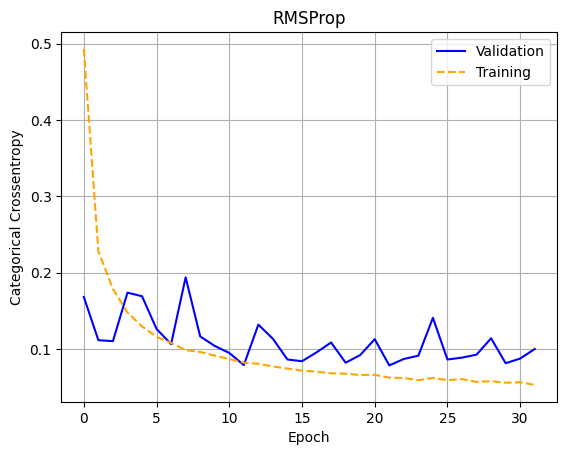

In [8]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h0.history['loss'],color='orange',linestyle='dashed')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['Validation','Training'])
plt.title('RMSProp')
plt.grid()
plt.show()

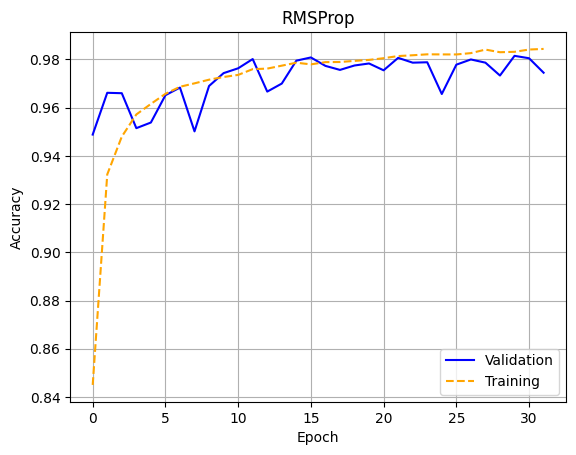

In [9]:
plt.plot(h0.history['val_accuracy'],color='blue',linestyle='solid')
plt.plot(h0.history['accuracy'],color='orange',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Validation','Training'])
plt.title('RMSProp')
plt.grid()
plt.show()

### Second Model, AdaGrad

In [10]:
%%time
h1=model_build('adagrad',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.2555 - loss: 2.1198 - val_accuracy: 0.6340 - val_loss: 1.3972
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6000 - loss: 1.3476 - val_accuracy: 0.7413 - val_loss: 0.9688
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.6981 - loss: 1.0068 - val_accuracy: 0.8085 - val_loss: 0.7362
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7604 - loss: 0.8051 - val_accuracy: 0.8468 - val_loss: 0.5880
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8060 - loss: 0.6734 - val_accuracy: 0.8707 - val_loss: 0.4918
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8300 - loss: 0.5880 - val_accuracy: 0.8848 - val_loss: 0.4276
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8510 - loss: 0.5231 - val_accuracy: 0.8962 - val_loss: 0.3836
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.8618 - loss: 0.4798 - v

### Third Model, SGD + Nesterov Mommentum

In [11]:
opt012=tf.keras.optimizers.SGD(momentum=0.5,
                               nesterov=True,
                               name='nSGD'
                              )

In [12]:
%%time
h2=model_build(opt012,num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.5241 - loss: 1.4346 - val_accuracy: 0.9125 - val_loss: 0.3150
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8855 - loss: 0.3890 - val_accuracy: 0.9465 - val_loss: 0.1961
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9239 - loss: 0.2599 - val_accuracy: 0.9505 - val_loss: 0.1708
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9373 - loss: 0.2169 - val_accuracy: 0.9615 - val_loss: 0.1314
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9484 - loss: 0.1768 - val_accuracy: 0.9647 - val_loss: 0.1212
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9559 - loss: 0.1550 - val_accuracy: 0.9688 - val_loss: 0.1116
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9596 - loss: 0.1402 - val_accuracy: 0.9662 - val_loss: 0.1143
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9617 - loss: 0.129

### 4th Model, Adam

In [13]:
%%time
h3=model_build('adam',num_classes,input_shape,batch_size,num_epochs,x_train,y_train,x_test,y_test)

History Match:
Epoch 1/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7562 - loss: 0.7620 - val_accuracy: 0.9488 - val_loss: 0.1732
Epoch 2/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9371 - loss: 0.2084 - val_accuracy: 0.9642 - val_loss: 0.1261
Epoch 3/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9516 - loss: 0.1613 - val_accuracy: 0.9665 - val_loss: 0.1213
Epoch 4/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9600 - loss: 0.1376 - val_accuracy: 0.9688 - val_loss: 0.1106
Epoch 5/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9646 - loss: 0.1199 - val_accuracy: 0.9728 - val_loss: 0.0932
Epoch 6/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9668 - loss: 0.1145 - val_accuracy: 0.9748 - val_loss: 0.0924
Epoch 7/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9690 - loss: 0.1077 - val_accuracy: 0.9727 - val_loss: 0.0950
Epoch 8/32
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.9703 - loss: 0.1001 - 

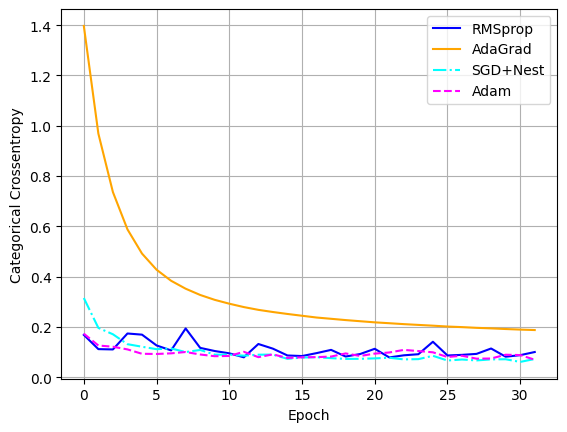

In [14]:
plt.plot(h0.history['val_loss'],color='blue',linestyle='solid')
plt.plot(h1.history['val_loss'],color='orange',linestyle='solid')
plt.plot(h2.history['val_loss'],color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_loss'],color='magenta',linestyle='dashed')
plt.ylabel('Categorical Crossentropy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.grid()
plt.show()

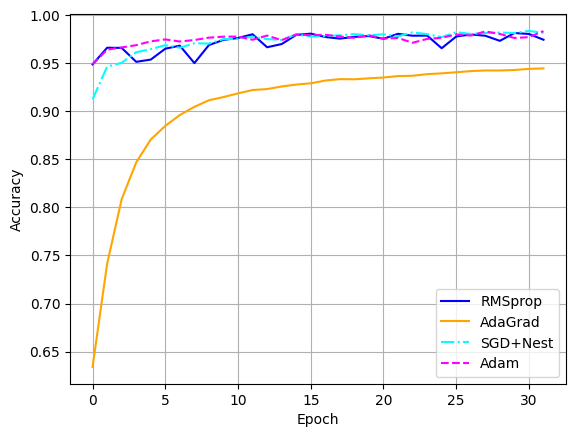

In [15]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.grid()
plt.show()

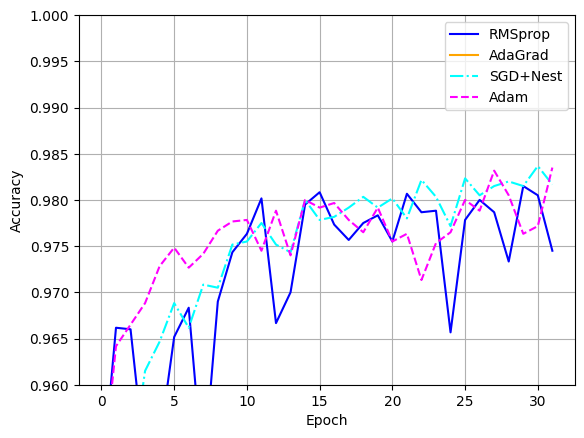

In [16]:
plt.plot(h0.history['val_accuracy'], color='blue',linestyle='solid')
plt.plot(h1.history['val_accuracy'], color='orange',linestyle='solid')
plt.plot(h2.history['val_accuracy'], color='cyan',linestyle='dashdot')
plt.plot(h3.history['val_accuracy'], color='magenta',linestyle='dashed')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['RMSprop','AdaGrad','SGD+Nest','Adam'])
plt.grid()
plt.ylim([0.96,1.00])
plt.show()

In [17]:
m=model_core(input_shape,num_classes)
m.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 128)                 │          20,096 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 37,898 (148.04 KB)

 Trainable params: 37,898 (148.04 KB)

 Non-trainable params: 0 (0.00 B)